# This jupyter notebook analyzes data about DC characters.

In [1]:
# KEY TAKEAWAYS FROM THE DATA.

#1: 6,689 total superheroes.

#2: 4,783 male superheroes, 1,967 female superheroes, 20 genderless superheroes, and 1 transgender superhero. 

#3: First DC superheroes appeared in 1935 and the most recent, in this dataset, appeared in 2013.

#4: Batman, Superman, and the Green Latern appeared the most times in comics, 
# indicating they could be the most popular DC superheroes or the ones whose comics were the most lucrative for DC.

#5: Wonderwoman, Dinah Laurel Lance, and GenderTest were the only female superheroes to appear in the top 10 list of 
# most superhero appearances. 

#6: There was an increase in superheroe appearances during the recession of 2008.

#7: Bad superheroes had higher rates of death than good superheroes. 

#8: Almost no reformed superheroes, meaning when a superheroe is bad, they tend to stay bad.

#9: A slightly larger number of bad superheroes than good superheroes.

#10: Bad superheroes were more likely to have a secret identity than good superheroes. 

#11: 4 times as many bad male superheroes as female superheroes. Meaning if DC created another villain superheroe, 
#there's a high chance they would be male.

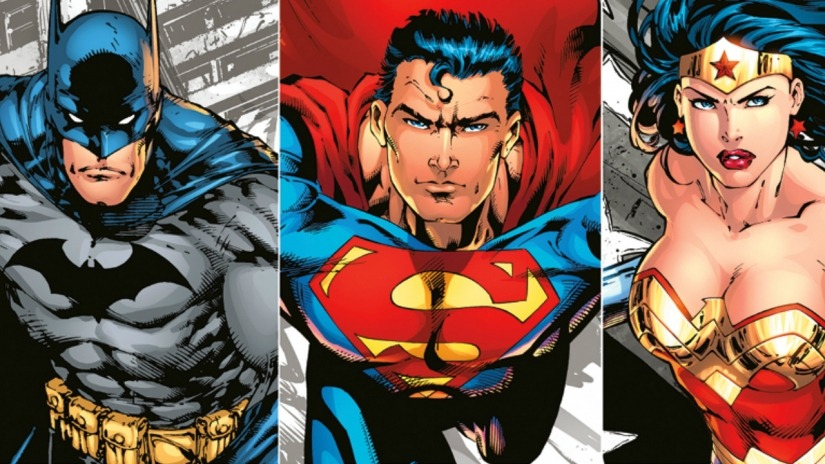

In [2]:
from IPython.display import Image
Image(filename='dc.jpg', width = 500, height = 200)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('dc-wikia-data.csv', header=0,encoding = 'unicode_escape')
df.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [5]:
# 6,896 rows and 13 columns.
df.shape

(6896, 13)

# Cleaning up the data.

In [6]:
# Dropping page_id column.
df = df.drop('page_id', axis=1)
df.head()

,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [7]:
# Changing column name to NAME and urlslug to URLSLUG.
# This way these two columns match the format of the other columns.
df.rename(columns={'name':'NAME'}, inplace=True)
df.rename(columns={'urlslug':'URLSLUG'}, inplace=True)
df.head()

,NAME,URLSLUG,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [8]:
# The GSM column has almost all of its values empty. The eye and hair columns also have significant amounts of missing values.
df.describe(include='all')

,NAME,URLSLUG,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
count,6896,6896,4883,6295,3268,4622,6771,64,6893,6541.000000,6827,6827.000000
unique,6896,6896,3,4,17,17,4,2,2,NaN,774,NaN
top,Theodoric (New Earth),\/wiki\/Jolt_II_(New_Earth),Public Identity,Bad Characters,Blue Eyes,Black Hair,Male Characters,Homosexual Characters,Living Characters,NaN,"2010, December",NaN
freq,1,1,2466,2895,1102,1574,4783,54,5200,NaN,78,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.625134,NaN,1989.766662
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.378509,NaN,16.824194
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1935.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,1983.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,1992.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,NaN,2003.000000


In [9]:
# Further look at the data in this column reveals that it identifies whether or not a DC character is homosexual or bisexual. 
# It can be assummed that the blank values in this column represent straight characters.
df['GSM'].value_counts()

Homosexual Characters    54
Bisexual Characters      10
Name: GSM, dtype: int64

In [10]:
# Replacing blank values in GSM with the term "Straight Characters".
df = df.fillna(value='No Value')
df = df.replace({'GSM': {'No Value': 'Straight Characters'}})
df.head()

,NAME,URLSLUG,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,3093,"1939, May",1939
1,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,2496,"1986, October",1986
2,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Straight Characters,Living Characters,1565,"1959, October",1959
3,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Straight Characters,Living Characters,1316,"1987, February",1987
4,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,1237,"1940, April",1940


In [11]:
# Renaming GSM column to "SEXUAL ORIENTATION" so it's easier to understand.
df.rename(columns={'GSM':'SEXUAL_ORIENTATION'}, inplace=True)
df.head()

,NAME,URLSLUG,ID,ALIGN,EYE,HAIR,SEX,SEXUAL_ORIENTATION,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,3093,"1939, May",1939
1,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,2496,"1986, October",1986
2,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Straight Characters,Living Characters,1565,"1959, October",1959
3,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Straight Characters,Living Characters,1316,"1987, February",1987
4,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,1237,"1940, April",1940


In [12]:
# Cleaning up the NAME column as it appears to have a mix of superhero names, the universes the heroes are from, and
# their real names as well.
df['NAME_2'] = df['NAME'].str.split('(').str[0]
df.head()

,NAME,URLSLUG,ID,ALIGN,EYE,HAIR,SEX,SEXUAL_ORIENTATION,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,NAME_2
0,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,3093,"1939, May",1939,Batman
1,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,2496,"1986, October",1986,Superman
2,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Straight Characters,Living Characters,1565,"1959, October",1959,Green Lantern
3,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Straight Characters,Living Characters,1316,"1987, February",1987,James Gordon
4,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,1237,"1940, April",1940,Richard Grayson


In [13]:
df.head()

,NAME,URLSLUG,ID,ALIGN,EYE,HAIR,SEX,SEXUAL_ORIENTATION,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,NAME_2
0,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,3093,"1939, May",1939,Batman
1,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,2496,"1986, October",1986,Superman
2,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Straight Characters,Living Characters,1565,"1959, October",1959,Green Lantern
3,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Straight Characters,Living Characters,1316,"1987, February",1987,James Gordon
4,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,1237,"1940, April",1940,Richard Grayson


In [14]:
# Renaming "NAME_2" column to "SUPERHERO_NAME".
df.rename(columns={'NAME_2':'SUPERHERO_NAME'}, inplace=True)
df.head()

,NAME,URLSLUG,ID,ALIGN,EYE,HAIR,SEX,SEXUAL_ORIENTATION,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,SUPERHERO_NAME
0,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,3093,"1939, May",1939,Batman
1,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,2496,"1986, October",1986,Superman
2,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Straight Characters,Living Characters,1565,"1959, October",1959,Green Lantern
3,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Straight Characters,Living Characters,1316,"1987, February",1987,James Gordon
4,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,1237,"1940, April",1940,Richard Grayson


In [15]:
df['NAME_2'] = df['NAME'].str.split('(').str[1]
df.head()

,NAME,URLSLUG,ID,ALIGN,EYE,HAIR,SEX,SEXUAL_ORIENTATION,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,SUPERHERO_NAME,NAME_2
0,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,3093,"1939, May",1939,Batman,Bruce Wayne)
1,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,2496,"1986, October",1986,Superman,Clark Kent)
2,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Straight Characters,Living Characters,1565,"1959, October",1959,Green Lantern,Hal Jordan)
3,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Straight Characters,Living Characters,1316,"1987, February",1987,James Gordon,New Earth)
4,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,1237,"1940, April",1940,Richard Grayson,New Earth)


In [16]:
# Renaming "NAME_2" column to "REAL_NAME".
df.rename(columns={'NAME_2':'REAL_NAME'}, inplace=True)
df.head()

,NAME,URLSLUG,ID,ALIGN,EYE,HAIR,SEX,SEXUAL_ORIENTATION,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,SUPERHERO_NAME,REAL_NAME
0,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,3093,"1939, May",1939,Batman,Bruce Wayne)
1,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,2496,"1986, October",1986,Superman,Clark Kent)
2,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Straight Characters,Living Characters,1565,"1959, October",1959,Green Lantern,Hal Jordan)
3,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Straight Characters,Living Characters,1316,"1987, February",1987,James Gordon,New Earth)
4,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,1237,"1940, April",1940,Richard Grayson,New Earth)


In [17]:
# Replacing the values "New Earth" with "No Value" as the "New Earth" references the universe the superheroes are from.
df = df.replace({'REAL_NAME': {'New Earth)': 'No Value'}})
df.head()

,NAME,URLSLUG,ID,ALIGN,EYE,HAIR,SEX,SEXUAL_ORIENTATION,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,SUPERHERO_NAME,REAL_NAME
0,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,3093,"1939, May",1939,Batman,Bruce Wayne)
1,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,2496,"1986, October",1986,Superman,Clark Kent)
2,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Straight Characters,Living Characters,1565,"1959, October",1959,Green Lantern,Hal Jordan)
3,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Straight Characters,Living Characters,1316,"1987, February",1987,James Gordon,No Value
4,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,1237,"1940, April",1940,Richard Grayson,No Value


In [18]:
# Dropping NAME column.
df = df.drop('NAME', axis=1)
df.head()

,URLSLUG,ID,ALIGN,EYE,HAIR,SEX,SEXUAL_ORIENTATION,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,SUPERHERO_NAME,REAL_NAME
0,\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,3093,"1939, May",1939,Batman,Bruce Wayne)
1,\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,2496,"1986, October",1986,Superman,Clark Kent)
2,\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Straight Characters,Living Characters,1565,"1959, October",1959,Green Lantern,Hal Jordan)
3,\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Straight Characters,Living Characters,1316,"1987, February",1987,James Gordon,No Value
4,\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,1237,"1940, April",1940,Richard Grayson,No Value


In [19]:
df.rename(columns={'FIRST APPEARANCE':'FIRST_APPEARANCE'}, inplace=True)
df.head()

,URLSLUG,ID,ALIGN,EYE,HAIR,SEX,SEXUAL_ORIENTATION,ALIVE,APPEARANCES,FIRST_APPEARANCE,YEAR,SUPERHERO_NAME,REAL_NAME
0,\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,3093,"1939, May",1939,Batman,Bruce Wayne)
1,\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,2496,"1986, October",1986,Superman,Clark Kent)
2,\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Straight Characters,Living Characters,1565,"1959, October",1959,Green Lantern,Hal Jordan)
3,\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Straight Characters,Living Characters,1316,"1987, February",1987,James Gordon,No Value
4,\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,1237,"1940, April",1940,Richard Grayson,No Value


In [20]:
df['FIRST_APPEARANCE_MONTH'] = df['FIRST_APPEARANCE'].str.split(',').str[1]
df.head()

,URLSLUG,ID,ALIGN,EYE,HAIR,SEX,SEXUAL_ORIENTATION,ALIVE,APPEARANCES,FIRST_APPEARANCE,YEAR,SUPERHERO_NAME,REAL_NAME,FIRST_APPEARANCE_MONTH
0,\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,3093,"1939, May",1939,Batman,Bruce Wayne),May
1,\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,2496,"1986, October",1986,Superman,Clark Kent),October
2,\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Straight Characters,Living Characters,1565,"1959, October",1959,Green Lantern,Hal Jordan),October
3,\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Straight Characters,Living Characters,1316,"1987, February",1987,James Gordon,No Value,February
4,\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,1237,"1940, April",1940,Richard Grayson,No Value,April


In [21]:
df.rename(columns={'YEAR':'FIRST_APPEARANCE_YEAR'}, inplace=True)
df.head()

,URLSLUG,ID,ALIGN,EYE,HAIR,SEX,SEXUAL_ORIENTATION,ALIVE,APPEARANCES,FIRST_APPEARANCE,FIRST_APPEARANCE_YEAR,SUPERHERO_NAME,REAL_NAME,FIRST_APPEARANCE_MONTH
0,\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,3093,"1939, May",1939,Batman,Bruce Wayne),May
1,\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,2496,"1986, October",1986,Superman,Clark Kent),October
2,\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Straight Characters,Living Characters,1565,"1959, October",1959,Green Lantern,Hal Jordan),October
3,\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Straight Characters,Living Characters,1316,"1987, February",1987,James Gordon,No Value,February
4,\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,1237,"1940, April",1940,Richard Grayson,No Value,April


In [22]:
# Dropping FIRST_APPEARANCE column.
df = df.drop('FIRST_APPEARANCE', axis=1)
df.head()

,URLSLUG,ID,ALIGN,EYE,HAIR,SEX,SEXUAL_ORIENTATION,ALIVE,APPEARANCES,FIRST_APPEARANCE_YEAR,SUPERHERO_NAME,REAL_NAME,FIRST_APPEARANCE_MONTH
0,\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,3093,1939,Batman,Bruce Wayne),May
1,\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,2496,1986,Superman,Clark Kent),October
2,\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Straight Characters,Living Characters,1565,1959,Green Lantern,Hal Jordan),October
3,\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Straight Characters,Living Characters,1316,1987,James Gordon,No Value,February
4,\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,1237,1940,Richard Grayson,No Value,April


In [23]:
# Replacing the values in ALIGN so they're easier to visualize.
df = df.replace({'ALIGN': {'Good Characters': 'Good'}})
df = df.replace({'ALIGN': {'Bad Characters': 'Bad'}})
df = df.replace({'ALIGN': {'Neutral Characters': 'Neutral'}})
df.head()

,URLSLUG,ID,ALIGN,EYE,HAIR,SEX,SEXUAL_ORIENTATION,ALIVE,APPEARANCES,FIRST_APPEARANCE_YEAR,SUPERHERO_NAME,REAL_NAME,FIRST_APPEARANCE_MONTH
0,\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,3093,1939,Batman,Bruce Wayne),May
1,\/wiki\/Superman_(Clark_Kent),Secret Identity,Good,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,2496,1986,Superman,Clark Kent),October
2,\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good,Brown Eyes,Brown Hair,Male Characters,Straight Characters,Living Characters,1565,1959,Green Lantern,Hal Jordan),October
3,\/wiki\/James_Gordon_(New_Earth),Public Identity,Good,Brown Eyes,White Hair,Male Characters,Straight Characters,Living Characters,1316,1987,James Gordon,No Value,February
4,\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,1237,1940,Richard Grayson,No Value,April


In [59]:
df.dtypes

URLSLUG                   object
ID                        object
ALIGN                     object
EYE                       object
HAIR                      object
SEX                       object
SEXUAL_ORIENTATION        object
ALIVE                     object
APPEARANCES               object
FIRST_APPEARANCE_YEAR     object
SUPERHERO_NAME            object
REAL_NAME                 object
FIRST_APPEARANCE_MONTH    object
dtype: object

In [61]:
df['ALIGN'] = df.ALIGN.astype('str')

In [62]:
df.dtypes

URLSLUG                   object
ID                        object
ALIGN                     object
EYE                       object
HAIR                      object
SEX                       object
SEXUAL_ORIENTATION        object
ALIVE                     object
APPEARANCES               object
FIRST_APPEARANCE_YEAR     object
SUPERHERO_NAME            object
REAL_NAME                 object
FIRST_APPEARANCE_MONTH    object
dtype: object

In [63]:
df[((df["ALIGN"]=="Good") & (df["ALIGN"]<="Bad")) | (df["APPEARANCES"]<=1237)]

TypeError: '<=' not supported between instances of 'str' and 'int'

# Exploratory analysis.

In [107]:
df['SEX'].value_counts()

Male Characters           4783
Female Characters         1967
No Value                   125
Genderless Characters       20
Transgender Characters       1
Name: SEX, dtype: int64

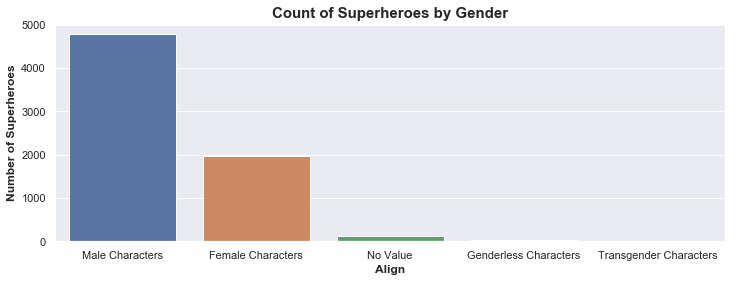

In [109]:
plt.subplots(figsize=(12,4))
sns.countplot(x='SEX', data=df)
plt.title('Count of Superheroes by Gender', fontweight = 'bold', fontsize=15)
plt.ylabel('Number of Superheroes', fontweight='bold')
plt.xlabel('Align', fontweight='bold')
sns.set()

In [73]:
# There are sligtly more bad DC characters than good DC characters.
df['ALIGN'].value_counts()

Bad                   2895
Good                  2832
No Value               601
Neutral                565
Reformed Criminals       3
Name: ALIGN, dtype: int64

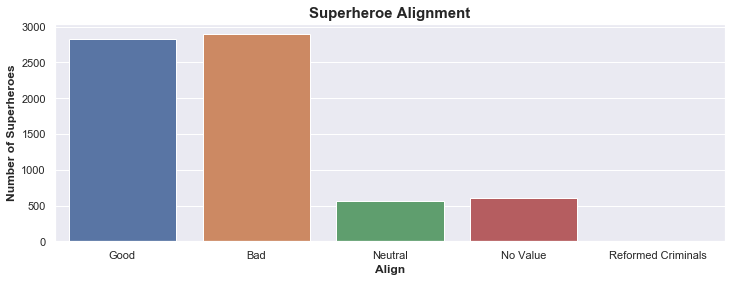

In [110]:
plt.subplots(figsize=(12,4))
sns.countplot(x='ALIGN', data=df)
plt.title('Superheroe Alignment', fontweight = 'bold', fontsize=15)
plt.ylabel('Number of Superheroes', fontweight='bold')
plt.xlabel('Align', fontweight='bold')
sns.set()

Text(0.5, 0, 'Align')

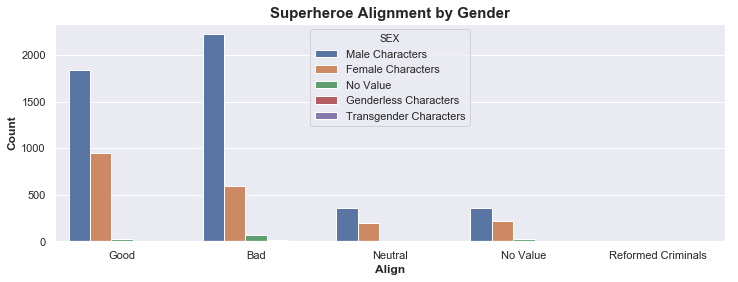

In [111]:
# Males have the highest count in each category. 
# 2 times as many good male characters as female characters.
# 4 times as many bad male characters as female characters.
# Almost no reformed criminals, meaning when a character is bad, they tend to stay bad.

plt.subplots(figsize=(12,4))
sns.countplot(x='ALIGN', hue='SEX', data=df)
sns.set()
plt.title('Superheroe Alignment by Gender', fontweight = 'bold', fontsize=15)
plt.ylabel('Count', fontweight='bold')
plt.xlabel('Align', fontweight='bold')

Text(0.5, 0, 'Align')

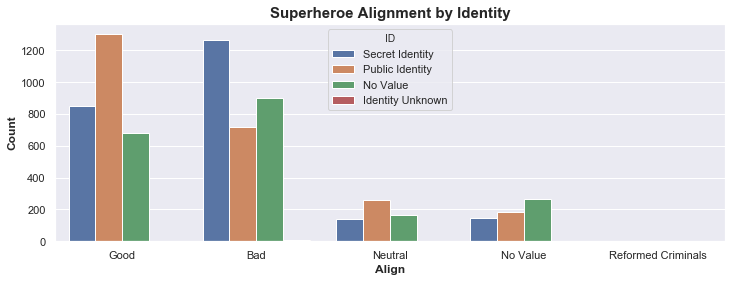

In [112]:
# Bad superheros were more likely to have a secret identity than good characters. 
plt.subplots(figsize=(12,4))
sns.countplot(x='ALIGN', hue='ID', data=df)
sns.set()
plt.title('Superheroe Alignment by Identity', fontweight = 'bold', fontsize=15)
plt.ylabel('Count', fontweight='bold')
plt.xlabel('Align', fontweight='bold')

Text(0.5, 0, 'Align')

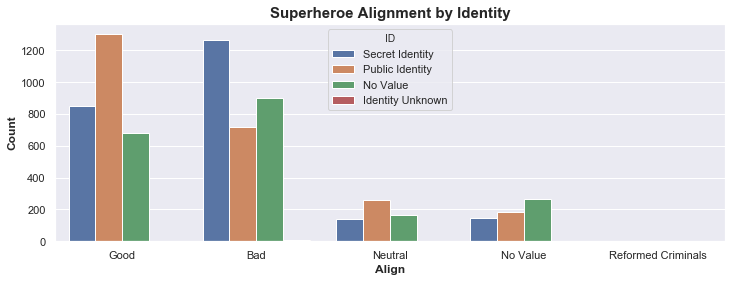

In [113]:
# Bad superheros were more likely to have a secret identity than good characters. 
plt.subplots(figsize=(12,4))
sns.countplot(x='ALIGN', hue='ID', data=df)
sns.set()
plt.title('Superheroe Alignment by Identity', fontweight = 'bold', fontsize=15)
plt.ylabel('Count', fontweight='bold')
plt.xlabel('Align', fontweight='bold')

Text(0.5, 0, 'Align')

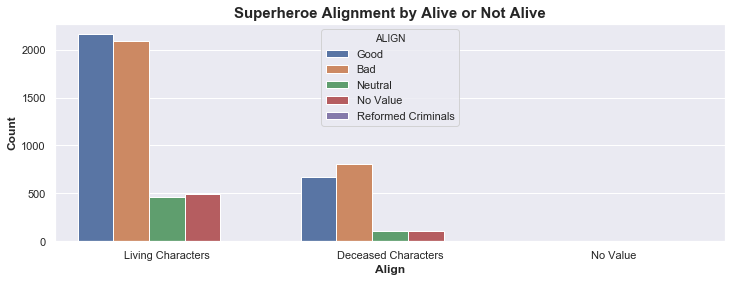

In [114]:
# Bad superheroes had higher rates of death than good superheroes. 
plt.subplots(figsize=(12,4))
sns.countplot(x='ALIVE', hue='ALIGN', data=df)
sns.set()
plt.title('Superheroe Alignment by Alive or Not Alive', fontweight = 'bold', fontsize=15)
plt.ylabel('Count', fontweight='bold')
plt.xlabel('Align', fontweight='bold')

In [76]:
# Dropping blank values. We can see that we still have 2 columns with blank values. For now lets drop those two columns,
# since we won't need them for the next few charts and graphs.
df_no_blanks = df
df_no_blanks = df.replace({'No Value': ''})
df_no_blanks.dropna()
df_no_blanks.isnull().sum()

URLSLUG                     0
ID                          0
ALIGN                       0
EYE                         0
HAIR                        0
SEX                         0
SEXUAL_ORIENTATION          0
ALIVE                       0
APPEARANCES                 0
FIRST_APPEARANCE_YEAR       0
SUPERHERO_NAME              0
REAL_NAME                   5
FIRST_APPEARANCE_MONTH    213
dtype: int64

In [77]:
df_no_blanks = df_no_blanks.dropna(axis = 1)
df_no_blanks.isnull().sum()

URLSLUG                  0
ID                       0
ALIGN                    0
EYE                      0
HAIR                     0
SEX                      0
SEXUAL_ORIENTATION       0
ALIVE                    0
APPEARANCES              0
FIRST_APPEARANCE_YEAR    0
SUPERHERO_NAME           0
dtype: int64

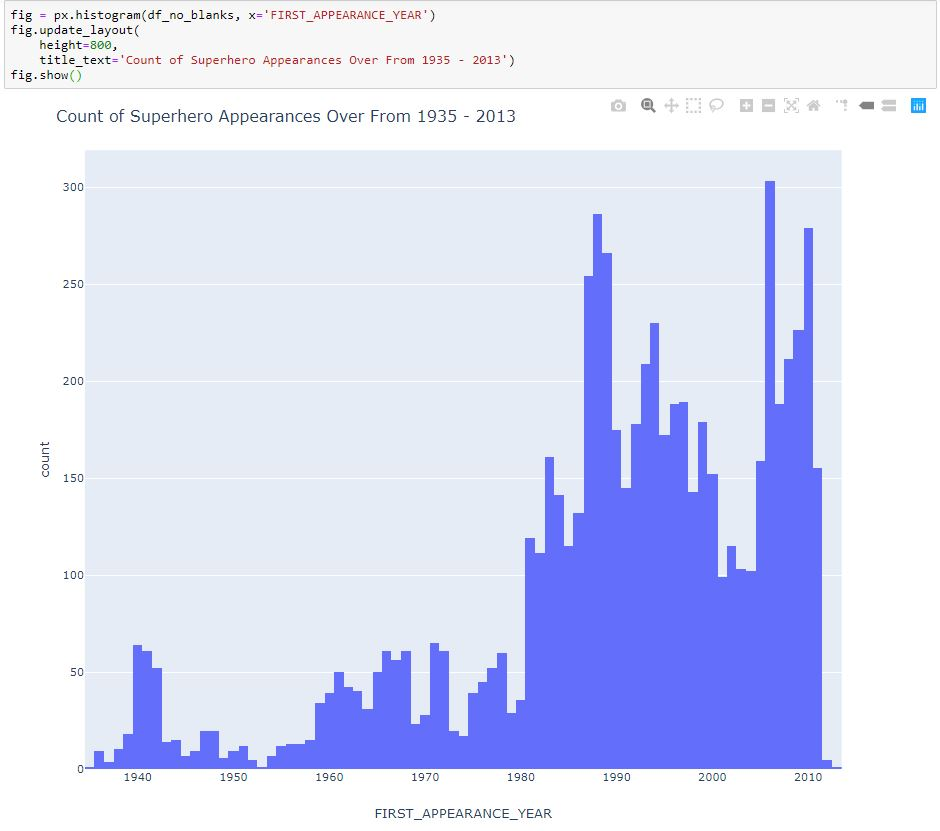

In [78]:
# From this histogram, we can see that the first DC superheroes appeared in 1935 and the most recent, in this dataset
# appeared in 2013.
# There also appears to have been a sudden jump in the appearance of DC superheroes starting in 1980. Which then cooled
# 10 years later in 1990. With another noticeable dip in the early 2000s.
# There did appear to be an increase in DC superheroes during the recession of 2008.
from IPython.display import Image
Image(filename='histogram.jpg', width =750, height = 450)

In [96]:
# Batman, Superman, and the Green Latern had the most superhero appearances. 
df

,URLSLUG,ID,ALIGN,EYE,HAIR,SEX,SEXUAL_ORIENTATION,ALIVE,APPEARANCES,FIRST_APPEARANCE_YEAR,SUPERHERO_NAME,REAL_NAME,FIRST_APPEARANCE_MONTH
0,\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,3093,1939,Batman,Bruce Wayne),May
1,\/wiki\/Superman_(Clark_Kent),Secret Identity,Good,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,2496,1986,Superman,Clark Kent),October
2,\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good,Brown Eyes,Brown Hair,Male Characters,Straight Characters,Living Characters,1565,1959,Green Lantern,Hal Jordan),October
3,\/wiki\/James_Gordon_(New_Earth),Public Identity,Good,Brown Eyes,White Hair,Male Characters,Straight Characters,Living Characters,1316,1987,James Gordon,No Value,February
4,\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,1237,1940,Richard Grayson,No Value,April
5,\/wiki\/Wonder_Woman_(Diana_Prince),Public Identity,Good,Blue Eyes,Black Hair,Female Characters,Straight Characters,Living Characters,1231,1941,Wonder Woman,Diana Prince),December
6,\/wiki\/Aquaman_(Arthur_Curry),Public Identity,Good,Blue Eyes,Blond Hair,Male Characters,Straight Characters,Living Characters,1121,1941,Aquaman,Arthur Curry),November
7,\/wiki\/Timothy_Drake_(New_Earth),Secret Identity,Good,Blue Eyes,Black Hair,Male Characters,Straight Characters,Living Characters,1095,1989,Timothy Drake,No Value,August
8,\/wiki\/Dinah_Laurel_Lance_(New_Earth),Public Identity,Good,Blue Eyes,Blond Hair,Female Characters,Straight Characters,Living Characters,1075,1969,Dinah Laurel Lance,No Value,November
9,\/wiki\/Flash_(Barry_Allen),Secret Identity,Good,Blue Eyes,Blond Hair,Male Characters,Straight Characters,Living Characters,1028,1956,Flash,Barry Allen),October
